In [1]:
# importando bibliotecas utilizadas
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Utilizando o modelo Naive Bayes para predição de dano na plantação

A predição será feita considerando os dados de categoria de pesticida, doses por semana, semanas utilizando e semanas sem uso.

De acordo com conclusões realizadas em meu relatório sobre o uso de modelos de machine learning para predição, utilizarei o modelo Naive Bayes.

Link do repositório: https://github.com/alexandrerussi/_N2020-machine-learning-covid19/

Link do relatório: https://github.com/alexandrerussi/_N2020-machine-learning-covid19/blob/master/relatorio/relatorio.pdf

In [2]:
# importando dataset
df = pd.read_csv('Safra_2018-2019.csv')
df = df.dropna()
df

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,SCROP79996,209,0,1,2,20,12.0,6,2,0
79996,79996,SCROP79997,232,0,1,2,20,12.0,9,1,0
79997,79997,SCROP79998,256,0,1,2,10,14.0,10,1,0
79998,79998,SCROP79999,256,0,1,2,10,16.0,8,2,0


## Dados para treinar o modelo

In [3]:
# definindo campos para treino do modelo e convertendo para numpy array
df1 = df[['Categoria_Pesticida','Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso']]
train_data = df1.to_numpy()
df1

,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso
0,1,0,0.0,0
1,1,0,0.0,0
2,1,0,0.0,0
3,1,0,0.0,0
4,1,0,0.0,0
...,...,...,...,...
79995,2,20,12.0,6
79996,2,20,12.0,9
79997,2,10,14.0,10
79998,2,10,16.0,8


In [4]:
# selecionando campo para treinar modelo supervisionado
df2 = df[['dano_na_plantacao']]
dano_na_plantacao = df2.to_numpy().flatten()

df2

,dano_na_plantacao
0,0
1,1
2,1
3,1
4,1
...,...
79995,0
79996,0
79997,0
79998,0


In [5]:
train_data, dano_na_plantacao

(array([[ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.],
        ...,
        [ 2., 10., 14., 10.],
        [ 2., 10., 16.,  8.],
        [ 2., 20., 11., 10.]]),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64))

# Treino do Naive Bayes

In [6]:
# instanciando Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(train_data, dano_na_plantacao)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# importando dados para predição
df_predict = pd.read_csv('Safra_2020.csv')
df_predict = df.dropna()
df_predict

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,SCROP79996,209,0,1,2,20,12.0,6,2,0
79996,79996,SCROP79997,232,0,1,2,20,12.0,9,1,0
79997,79997,SCROP79998,256,0,1,2,10,14.0,10,1,0
79998,79998,SCROP79999,256,0,1,2,10,16.0,8,2,0


In [8]:
# selecionando campos para predição e convertendo para numpy array
df_predict1 = df_predict[['Categoria_Pesticida','Doses_Semana', 'Semanas_Utilizando', 'Semanas_Sem_Uso']]
predict_data = df_predict1.to_numpy()
df_predict1

,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso
0,1,0,0.0,0
1,1,0,0.0,0
2,1,0,0.0,0
3,1,0,0.0,0
4,1,0,0.0,0
...,...,...,...,...
79995,2,20,12.0,6
79996,2,20,12.0,9
79997,2,10,14.0,10
79998,2,10,16.0,8


In [9]:
nb_predict = nb_clf.predict(predict_data)
nb_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
# salvando predição em csv file
output = pd.read_csv('output_dano_na_plantacao.csv')
output['dano_na_plantacao'] = nb_predict
output.to_csv('output_dano_na_plantacao.csv', index=False)

In [11]:
zero_array = []
one_array = []
two_array = []
for i in nb_predict:
    if i == 0:
        zero_array.append(i)
    elif i == 1:
        one_array.append(i)
    elif i == 2:
        two_array.append(i)

# contagem de previsões para 0, 1 e 2
print("Sem Danos: ", len(zero_array))
print("Danos causados por outros motivos: ", len(one_array))
print("Danos gerados pelos pesticidas: ", len(two_array))

# len(zero_array) + len(one_array) + len(two_array)

Sem Danos:  67348
Danos causados por outros motivos:  4596
Danos gerados pelos pesticidas:  1


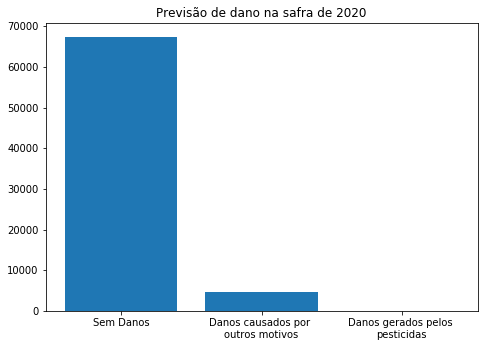

In [12]:
# gráfico em barras para visualização de predição de danos para safra de 2020

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
description = ['Sem Danos', 'Danos causados por \noutros motivos', 'Danos gerados pelos \npesticidas']
dano = [len(zero_array),len(one_array),len(two_array)]
ax.bar(description,dano)
ax.set_title("Previsão de dano na safra de 2020")
plt.show()